
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
Create a copy of the dataframe for the data wrangling.
Normalize the continuous variables. You can use any one method you want.
Encode the categorical variables
The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [1]:
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.shape

(9134, 24)

In [8]:
numericals = data.select_dtypes(np.number)
numericals.head()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [33]:
data = data.drop(['month'],axis=1)


In [10]:
numericals.isnull().sum()/len(data)

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64

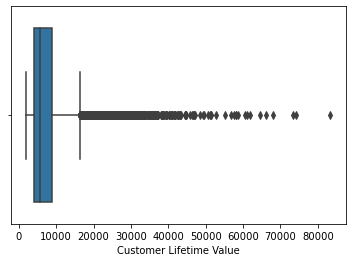

In [15]:
sns.boxplot(x ='Customer Lifetime Value', data=data)
plt.show()

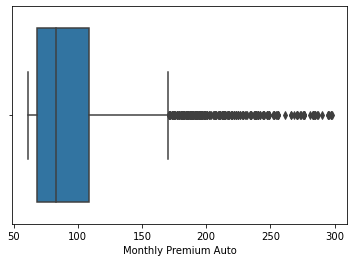

In [17]:
sns.boxplot(x ='Monthly Premium Auto', data=data)
plt.show()

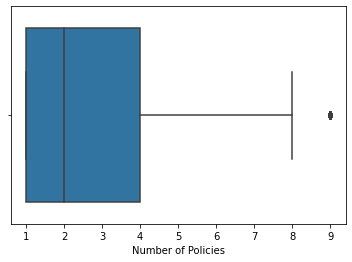

In [25]:
sns.boxplot(x ='Number of Policies', data=data)
plt.show()

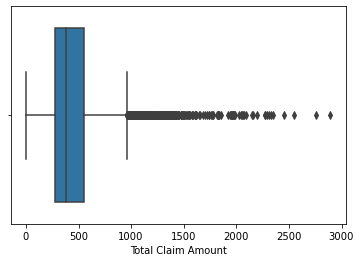

In [19]:
sns.boxplot(x ='Total Claim Amount', data=data)
plt.show()

In [21]:
# Dealing with outliers 
iqr = np.percentile(data['Customer Lifetime Value'],75) - np.percentile(data['Customer Lifetime Value'],25)
upper_limit = np.percentile(data['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(data['Customer Lifetime Value'],25) - 1.5*iqr
# Normalization
data = data[(data['Customer Lifetime Value']>lower_limit) & (data['Customer Lifetime Value']<upper_limit)]

In [24]:
# Dealing with outliers
iqr = np.percentile(data['Monthly Premium Auto'],75) - np.percentile(data['Monthly Premium Auto'],25)
upper_limit = np.percentile(data['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(data['Monthly Premium Auto'],25) - 1.5*iqr
# Normalization
data = data[(data['Monthly Premium Auto']>lower_limit) & (data['Monthly Premium Auto']<upper_limit)]

In [26]:
# Dealing with outliers
iqr = np.percentile(data['Number of Policies'],75) - np.percentile(data['Number of Policies'],25)
upper_limit = np.percentile(data['Number of Policies'],75) + 1.5*iqr
lower_limit = np.percentile(data['Number of Policies'],25) - 1.5*iqr
# Normalization
data = data[(data['Number of Policies']>lower_limit) & (data['Number of Policies']<upper_limit)]

In [27]:
# Dealing with outliers
iqr = np.percentile(data['Total Claim Amount'],75) - np.percentile(data['Total Claim Amount'],25)
upper_limit = np.percentile(data['Total Claim Amount'],75) + 1.5*iqr
lower_limit = np.percentile(data['Total Claim Amount'],25) - 1.5*iqr
# Normalization
data = data[(data['Total Claim Amount']>lower_limit) & (data['Total Claim Amount']<upper_limit)]

In [28]:
data_new = data

# Normalization

In [29]:
from sklearn.preprocessing import Normalizer

In [30]:
X = data_new.select_dtypes(include=np.number)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

# Transforming time variables (day, week and month) to integers.

In [32]:
data_new['day'] = pd.DatetimeIndex(data_new['Effective To Date']).day
data_new['month'] = pd.DatetimeIndex(data_new['Effective To Date']).month
data_new['year'] = pd.DatetimeIndex(data_new['Effective To Date']).year
data_new.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,1,2011


In [35]:
# Droping Effective To date column
data_new = data_new.drop(['Effective To Date'], axis=1)

In [36]:
# df_new['effective_to_date'] = df_new['day'].map(str) + df_new['month'].map(str) + df_new['year'].map(str)


In [37]:
data_new

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,6,1,2011
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,2,2011
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,2,2011
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,2,2011


In [38]:
# data_new = data_new.drop(['day'], axis=1)
# data_new = data_new.drop(['month'], axis=1)
# data_new = data_new.drop(['year'], axis=1)
# data_new = data_new.drop(['customer'], axis=1) # customer id is not a value


In [40]:
# df_new['Effective To date'] = df_new['effective_to_date'].astype('int')
data_new['day'] = data_new['day'].astype('int')
data_new['month'] = data_new['month'].astype('int')
data_new['month'] = data_new['month'].astype('int')

In [41]:
data_new

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,6,1,2011
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,2,2011
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,2,2011
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,2,2011


In [42]:
data_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7399 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       7399 non-null   object 
 1   State                          7399 non-null   object 
 2   Customer Lifetime Value        7399 non-null   float64
 3   Response                       7399 non-null   object 
 4   Coverage                       7399 non-null   object 
 5   Education                      7399 non-null   object 
 6   EmploymentStatus               7399 non-null   object 
 7   Gender                         7399 non-null   object 
 8   Income                         7399 non-null   int64  
 9   Location Code                  7399 non-null   object 
 10  Marital Status                 7399 non-null   object 
 11  Monthly Premium Auto           7399 non-null   int64  
 12  Months Since Last Claim        7399 non-null   i

# Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


In [43]:
cat = data_new.select_dtypes(include = np.object)
cat

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [44]:
col = cat.columns
col


Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [48]:
categorical=pd.get_dummies(cat, columns =['State', 'Response', 'Coverage', 'Education',
        'Gender', 'Location Code',
        'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],drop_first=False)
categorical.head()


,Customer,EmploymentStatus,Marital Status,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,Employed,Married,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,AI49188,Employed,Married,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,WW63253,Unemployed,Married,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,HB64268,Employed,Single,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,OC83172,Employed,Married,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
